In [1]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_adversarial_examples_by_id, load_posterior_samples_by_id, get_model_by_id
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot, plot_something
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style

import matplotlib.pyplot as plt 

import torch 
import numpy as np


from rbi.loss import MMDsquared, MMDsquaredOptimalKernel
from rbi.loss.kernels import MultiKernel, RBFKernel, LinearKernel, RationalQuadraticKernel, LaplaceKernel
from rbi.loss.mmd import RBFKernel, select_kernel_combination, select_kernel, select_bandwith_by_median_distance

from rbibm.utils.get_task import get_task
from rbibm.utils.ground_truth_metrics import compute_ground_truth_mmds


In [2]:
name = "benchmark"

In [3]:
tasks = ["gaussian_linear", "lotka_volterra", "vae_task", "sir"]

In [4]:
metrics = {}
for task in tasks:
    metrics[task] =  compute_ground_truth_mmds(name, task=task, model_name="maf", defense="None")

In [5]:
metrics_fim2 = {}
for task in tasks:
    metrics_fim2[task] =  compute_ground_truth_mmds(name, task=task, model_name="maf", defense="FIMTraceRegularizer", params_defense_beta=0.001)

In [6]:
metrics_fim3 = {}
for task in tasks:
    metrics_fim3[task] =  compute_ground_truth_mmds(name, task=task, model_name="maf", defense="FIMTraceRegularizer", params_defense_beta=0.01)

In [7]:
metrics_fim4 = {}
for task in tasks:
    metrics_fim4[task] =  compute_ground_truth_mmds(name, task=task, model_name="maf", defense="FIMTraceRegularizer", params_defense_beta=0.1)

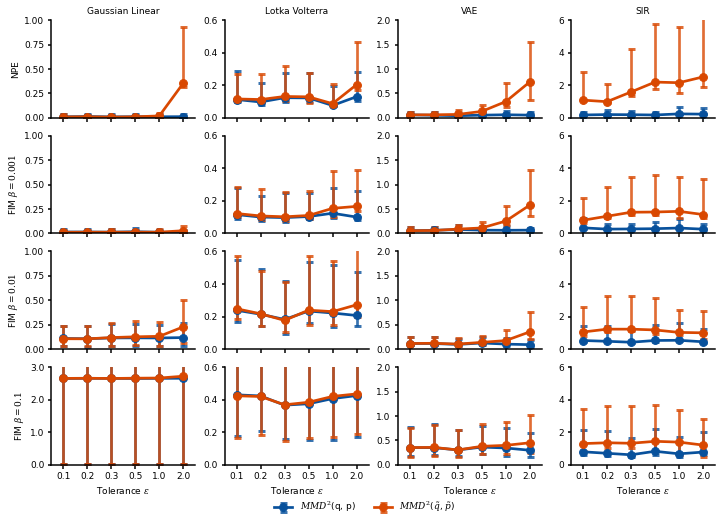

In [8]:
epsilons = [0.1,0.2,0.3,0.5,1.,2.]
colors = ["#08519c", "#d94801"]
task_name = ["Gaussian Linear", "Lotka Volterra", "VAE", "SIR"]
with use_style("pyloric"):
    fig, axes = plt.subplots(4,4, figsize=(10,7))
    for i in range(4):
        ax = axes[0,i]
        if i == 3:
            pass
            ax.set_ylim(0,6)
        elif i == 2:
            pass
            ax.set_ylim(0, 2.)
        elif i == 1:
            ax.set_ylim(0, 0.6)
        else:
            pass
            ax.set_ylim(0, 1.)
        ax.set_title(task_name[i])
        dxxq, dxtildex_tildeq, dxxtilde, dxxtilde_q, dxtrue_xtilde = metrics[tasks[i]]
        plot_something(epsilons,[[x[0] for x in dxxq], [x[0] for x in dxtildex_tildeq]], colors=colors,legend=False,labels=["MMD(q, p)", r"MMD($\tilde{q}$, $\tilde{p}$)"], ax=ax,y_error=[([x[1] for x in dxxq],[x[2] for x in dxxq]), ([x[1] for x in dxtildex_tildeq], [x[2] for x in dxtildex_tildeq])])
        ax.set_xticklabels([])
        ax.set_xlabel(None)

    for i in range(4):
        ax = axes[1,i]
        if i == 3:
            ax.set_ylim(0,6)
            m = metrics_fim2
        elif i == 2:
            ax.set_ylim(0, 2.)
            m = metrics_fim2
        elif i == 1:
            ax.set_ylim(0, 0.6)
        else:
            ax.set_ylim(0, 1.)
            m = metrics_fim2


        dxxq, dxtildex_tildeq, dxxtilde, dxxtilde_q, dxtrue_xtilde = m[tasks[i]]
        plot_something(epsilons,[[x[0] for x in dxxq], [x[0] for x in dxtildex_tildeq]], colors=colors,legend=False,labels=["MMD(q, p)", r"MMD($\tilde{q}$, $\tilde{p}$)"], ax=ax,y_error=[([x[1] for x in dxxq],[x[2] for x in dxxq]), ([x[1] for x in dxtildex_tildeq], [x[2] for x in dxtildex_tildeq])])
        ax.set_xticklabels([])
        ax.set_xlabel(None)
   
    for i in range(4):
        ax = axes[2,i]
        if i == 3:
            ax.set_ylim(0,6)
            m = metrics_fim3
        elif i == 2:
            ax.set_ylim(0, 2.)
            m = metrics_fim3
        elif i == 1:
            ax.set_ylim(0, 0.6)
        else:
            ax.set_ylim(0, 1.)
            m = metrics_fim3

        
        dxxq, dxtildex_tildeq, dxxtilde, dxxtilde_q, dxtrue_xtilde = m[tasks[i]]
        plot_something(epsilons,[[x[0] for x in dxxq], [x[0] for x in dxtildex_tildeq]], colors=colors,legend=False,labels=["MMD(q, p)", r"MMD($\tilde{q}$, $\tilde{p}$)"], ax=ax,y_error=[([x[1] for x in dxxq],[x[2] for x in dxxq]), ([x[1] for x in dxtildex_tildeq], [x[2] for x in dxtildex_tildeq])])

        ax.set_xticklabels([])
        ax.set_xlabel(None)

    for i in range(4):
        ax = axes[3,i]
        if i == 3:
            ax.set_ylim(0,6)
            m = metrics_fim4
        elif i == 2:
            ax.set_ylim(0, 2.)
            m = metrics_fim4
        elif i == 1:
            ax.set_ylim(0, 0.6)
        else:
            ax.set_ylim(0, 3.)
            ax.set_yticks([0.0, 1.0, 2.0, 3.0])
            ax.set_yticklabels(["0.0", "1.0", "2.0", "3.0"])
            m = metrics_fim4

        
        dxxq, dxtildex_tildeq, dxxtilde, dxxtilde_q, dxtrue_xtilde = m[tasks[i]]
        plot_something(epsilons,[[x[0] for x in dxxq], [x[0] for x in dxtildex_tildeq]], colors=colors,legend=False,labels=["MMD(q, p)", r"MMD($\tilde{q}$, $\tilde{p}$)"], ax=ax,y_error=[([x[1] for x in dxxq],[x[2] for x in dxxq]), ([x[1] for x in dxtildex_tildeq], [x[2] for x in dxtildex_tildeq])])
    axes[0,0].set_ylabel("NPE")
    axes[1,0].set_ylabel(r"FIM $\beta=0.001$")
    axes[2,0].set_ylabel(r"FIM $\beta=0.01$")
    axes[3,0].set_ylabel(r"FIM $\beta=0.1$")
    
    fig.legend([r"$MMD^2$(q, p)", r"$MMD^2$($\tilde{q}$, $\tilde{p}$)"], loc="center", bbox_to_anchor=[0.5, -0.01], ncol=2)
    fig.tight_layout()

    fig.savefig("mmd_approx_fim_vs_nodefense.svg")